In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("C://Users//Prasaadh//Desktop//Data Science//Models//Customer Curn Prediction Using Random Forest//Data//train.csv")

In [6]:
test = pd.read_csv("C://Users//Prasaadh//Desktop//Data Science//Models//Customer Curn Prediction Using Random Forest//Data//test.csv")

In [5]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [10]:
train.select_dtypes(include = 'object').columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [11]:
train.select_dtypes(include = 'object').head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [12]:
train.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [13]:
test.area_code.unique()

array(['area_code_415', 'area_code_510', 'area_code_408'], dtype=object)

HANDLING CATEGORICAL VARIABLES 

In [14]:
train.area_code = train.area_code.map({'area_code_415':415,'area_code_408':408,'area_code_510':510})
test.area_code = test.area_code.map({'area_code_415':415,'area_code_408':408,'area_code_510':510})

In [15]:
train = train.replace({'voice_mail_plan':{'yes':1,'no':0}})
test = test.replace({'voice_mail_plan':{'yes':1,'no':0}})

In [16]:
train = train.replace({'international_plan':{'yes':1,'no':0}})
test = test.replace({'international_plan':{'yes':1,'no':0}})

In [17]:
train = train.replace({'churn':{'yes':1,"no":0}})
test = test.replace({'churn':{'yes':1,"no":0}})

In [18]:
train.state = train.state.astype('category')
test.state = test.state.astype('category')

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   category
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   int64   
 3   international_plan             4250 non-null   int64   
 4   voice_mail_plan                4250 non-null   int64   
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

In [20]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


EXPLORATORY DATA ANALYSIS

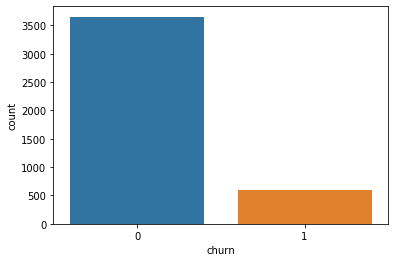

In [21]:
sns.countplot(x = 'churn',data = train)

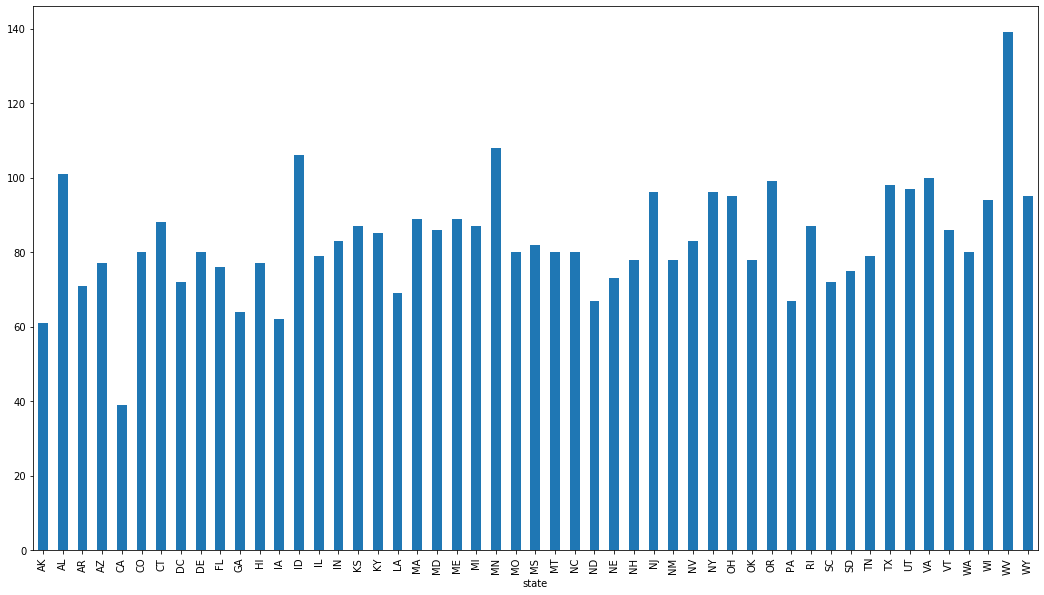

In [22]:
fig,ax = plt.subplots(figsize = (18,10)) 
x = train.groupby('state')[['churn']].size()
x.plot.bar()

In [23]:
train.groupby('churn')['number_customer_service_calls'].count()

churn
0    3652
1     598
Name: number_customer_service_calls, dtype: int64

In [24]:
def facet(data,y):
    g = sns.FacetGrid(data,col = 'churn',size = 5)
    g.map(plt.hist,y,alpha = 0.5)
    g.add_legend()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


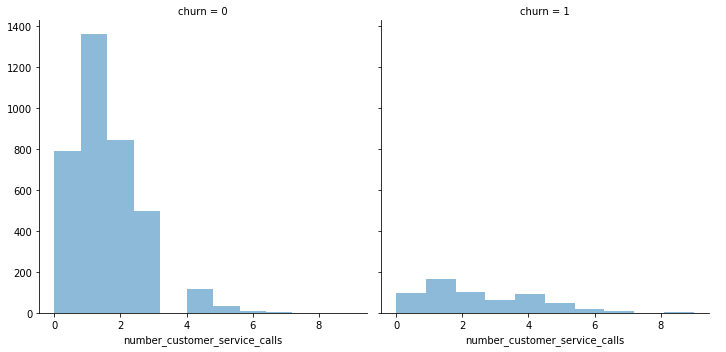

In [25]:
facet(train,'number_customer_service_calls')

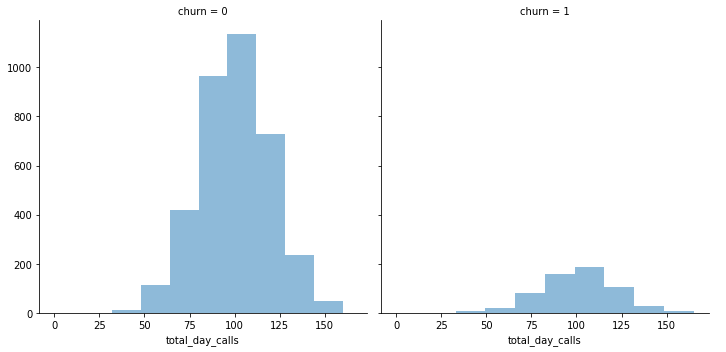

In [26]:
facet(train,'total_day_calls')

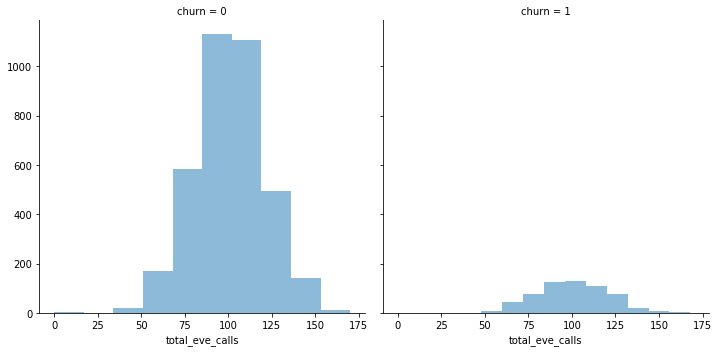

In [27]:
facet(train,'total_eve_calls')

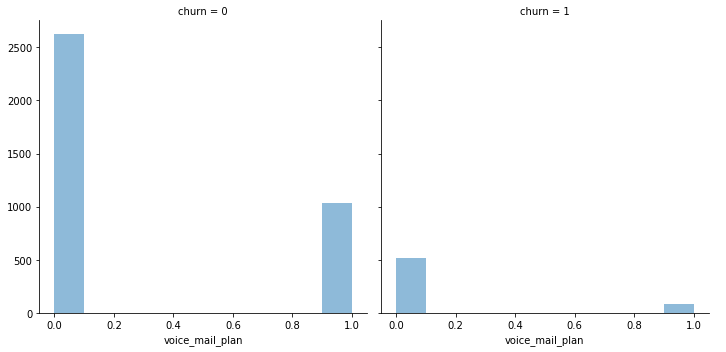

In [28]:
facet(train,'voice_mail_plan')

Checking Correlation between different variables

In [29]:
corr_matrix = train.corr()
corr_matrix

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.019969,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
area_code,-0.019969,1.000000,0.027863,-0.008344,-0.007127,-0.008200,-0.034485,-0.008204,0.010856,-0.008468,0.010870,0.006754,0.018148,0.006743,-0.006417,-0.019411,-0.006514,0.022880,0.015964
international_plan,0.027050,0.027863,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,0.001663,-0.008344,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.006626,-0.007127,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,-0.008200,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.034485,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,-0.008204,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010856,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,-0.008468,-0.003004,0.000263,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817


Deleting the variables which has high correlation with other variables

In [31]:
col_drop = ['total_day_minutes','total_night_minutes','total_eve_minutes','total_intl_minutes']

In [32]:
train = train.drop(columns = col_drop,axis = 1)
test = test.drop(columns = col_drop,axis = 1)

In [33]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
2,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
4,MA,121,510,0,1,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0
